# Image Classification using Convolutional Neural Networks in PyTorch

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

Download the images in png through a link, using torchvision and tarfile.

In [4]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [5]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [7]:
# Explore Folders
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [9]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [10]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [11]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape (3, 32, 32).

In [12]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [13]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0)) #Here, we say that the 1st dimension should become the 0th index, 2nd dimension should
                                     # become the 1st index and the 0th dimension should become the 2nd index 

Label:  airplane (0)


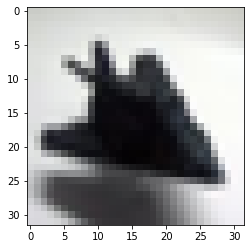

In [20]:
# Let's look at a couple of images from the dataset.
show_example(*dataset[0]) # The * operator splits the tuple into individual arguments i.e, image and label

Label:  airplane (0)


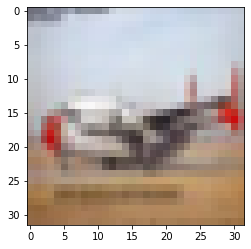

In [21]:
show_example(*dataset[1099])

# Training and Validation Datasets

In [22]:
import numpy as np

def split_indices(n, val_pct=0.1, seed=99):
    # Determine the size of validation set
    n_val =int(n*val_pct)
    # Set random seed for reproducability
    np.random.seed(seed)
    # Create random permutation from 0 to n-1
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [23]:
val_pct=0.3
rand_seed=42

train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices), len(val_indices))
print("Sample validation indices ",val_indices[:10])

35000 15000
Sample validation indices  [33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


In [24]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size=100

In [25]:
# Train sampler and Data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

# Validation sampler and Data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size, sampler=val_sampler)

In [26]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

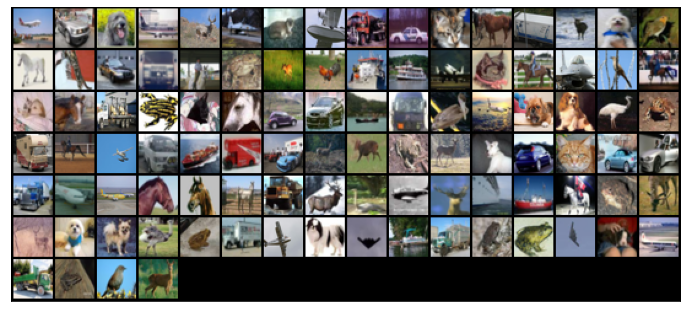

In [27]:
show_batch(train_dl)

# Defining the Model (Convolutional Neural Network)

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [30]:
for images, labels in train_dl:
    print("images.shape-", images.shape)
    out = simple_model(images)
    print("output.shape-", out.shape)
    break

images.shape- torch.Size([100, 3, 32, 32])
output.shape- torch.Size([100, 8, 16, 16])


In [31]:
model = nn.Sequential(
nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), # Outputs: bs*16*16*16

nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), # Outputs: bs*16*8*8

nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), # Outputs: bs*16*4*4

nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), # Outputs: bs*16*2*2

nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
nn.ReLU(),
nn.MaxPool2d(2,2), # Outputs: bs*16*1*1

nn.Flatten(), # Outputs: bs*16
nn.Linear(16,10) # Outputs: bs*10
)

In [32]:
for images, labels in train_dl:
    print("images.shape-", images.shape)
    out = model(images)
    print("output.shape-", out.shape)
    print("out[0]-", out[0])
    break

images.shape- torch.Size([100, 3, 32, 32])
output.shape- torch.Size([100, 10])
out[0]- tensor([ 0.1481,  0.0485,  0.2183,  0.1399, -0.0179,  0.1378, -0.2074, -0.0880,
         0.0962, -0.0921], grad_fn=<SelectBackward>)


In [33]:
probs=F.softmax(out[0])
probs

C:\Users\Chandan\AppData\Local\Temp/ipykernel_17764/450081383.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs=F.softmax(out[0])


tensor([0.1107, 0.1002, 0.1188, 0.1098, 0.0938, 0.1096, 0.0776, 0.0874, 0.1051,
        0.0871], grad_fn=<SoftmaxBackward>)

In [34]:
pred = torch.max(probs)
pred

tensor(0.1188, grad_fn=<MaxBackward1>)

In [35]:
dataset.classes[5]

'dog'

In [36]:
dataset.classes[labels[0]]

'frog'

As we can see, the output our model gives is a dog, but its actually a frog

# GPU

In [38]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [39]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [40]:
class DeviceDataLoader():
    """Wrap a Data Loader to wrap data to device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device) # normally we return, but here yiled is used.
                                            # yield returns the next batch of data into the device after the previous batch is uploaded to device.
    def __len__(self):
        # Number of batches
        return len(self.dl)

In [41]:
device = get_default_device()
device

device(type='cuda')

In [42]:
torch.cuda.is_available()

True

In [43]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=10, bias=True)
)

# Training Model

In [44]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Generate predictions
    preds = model(xb)
    # Calculate loss
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [45]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [47]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, 
        opt_fn=None, lr=None, metric=None):
    train_losses, val_losses, val_metrics = [], [], []
    
    # Instantiate the optimizer
    if opt_fn is None: opt_fn = torch.optim.SGD
    opt = opt_fn(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        # Training
        model.train()
        for xb,yb in train_dl:
            train_loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        model.eval()
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Record the loss & metric
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], train_loss: {:4f}, val_loss: {:.4f}'
                  .format(epoch+1, epochs, train_loss, val_loss))
        else:
            print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}'
                  .format(epoch+1, epochs, train_loss, val_loss, 
                          metric.__name__, val_metric))
    return train_losses, val_losses, val_metrics

In [48]:
def accuracy(outputs, labels):
    _,preds = torch.max(outputs, dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [51]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric=accuracy)
print("Loss: {:.4f}\nAccuracy: {:.4f}".format(val_loss, val_acc))

Loss: 2.3110
Accuracy: 0.0989


In [52]:
num_epochs = 10
opt_fn = torch.optim.Adam
lr=0.005

In [53]:
history = fit(num_epochs, model, F.cross_entropy, train_dl, valid_dl, opt_fn, lr, accuracy)
train_losses, val_losses, val_metrics = history

Epoch [1/10], train_loss: 1.6800, val_loss: 1.6555, val_accuracy: 0.3827
Epoch [2/10], train_loss: 1.3448, val_loss: 1.5699, val_accuracy: 0.4265
Epoch [3/10], train_loss: 1.4328, val_loss: 1.4063, val_accuracy: 0.4863
Epoch [4/10], train_loss: 1.3367, val_loss: 1.3184, val_accuracy: 0.5240
Epoch [5/10], train_loss: 1.2546, val_loss: 1.2540, val_accuracy: 0.5432
Epoch [6/10], train_loss: 1.1003, val_loss: 1.3227, val_accuracy: 0.5290
Epoch [7/10], train_loss: 1.2735, val_loss: 1.2141, val_accuracy: 0.5657
Epoch [8/10], train_loss: 1.3680, val_loss: 1.2107, val_accuracy: 0.5674
Epoch [9/10], train_loss: 1.2313, val_loss: 1.2036, val_accuracy: 0.5685
Epoch [10/10], train_loss: 1.1564, val_loss: 1.1635, val_accuracy: 0.5809


In [55]:
def plot_metric(metric_values):
    """Plot metric values on a line graph"""
    plt.plot(metric_values, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs no of epoch')

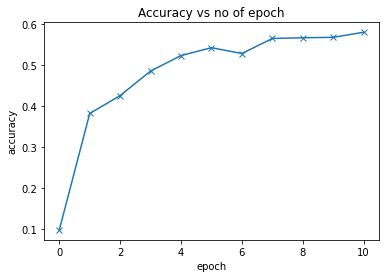

In [56]:
plot_metric([val_acc] + val_metrics)

Our model reaches an accuracy of around 59%, and by looking at the graph it seems unlikely that the accuracy will go above 65%. This suggests that we might need to use a more powerful model to capture the relationship between the images and the classes accurately. This can be done by adding more convolutionoal layers to our model, or increasing the nuber of channels in each convolution layer.